<a href="https://colab.research.google.com/github/SaraAlshamsi1/Foundations-of-Data-Science/blob/main/Assignment1_FODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [3]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [4]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-4-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
#merged_data.dtypes

In [5]:
pollution_data = merged_data[['pm10','neighborhood']]

In [6]:
pollution_data.shape[0]

118495

In [7]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [8]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [9]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [10]:
pollution_data['pm10'].min()

0.0

In [11]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [12]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [13]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

Task 1.1

In [14]:
joined_table.show(5)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


Task 1.2

In [15]:
# Print the number of rows in the joined table
print("Number of rows: ", joined_table.num_rows)

# Print the number of columns in the joined table
print("Number of columns: ", joined_table.num_columns)


Number of rows:  118495
Number of columns:  2


Task 1.3

In [16]:
# select the rows that have missing values to print the number of rows
missing_before=joined_table.where('pm10',are.equal_to(np.nan))
missing_before.show(2)

# Print the number of missing values
print("Number of missing before dropping values:", missing_before.num_rows)

# update table to be only rows that dont have missing values
joined_table = joined_table.where('pm10', are.not_equal_to(np.nan))

# # select the rows that have missing values to print the number of rowa
missing_after = joined_table.where('pm10', are.equal_to(np.nan))

# Print the number of missing values after removing NaNs
print("Number of missing after dropping values:", missing_after.num_rows)

# Print the total number of rows remaining in the dataset after cleaning
print("Number of total rows: ", joined_table.num_rows)


pm10,neighborhood


Number of missing before dropping values: 0
Number of missing after dropping values: 0
Number of total rows:  118495


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

Task 2.1

In [17]:
import numpy as np
from datascience import *  # Import the datascience library

merged_table=merged_data[['temperature','humidity','pm25','borough']]
merged_table=Table().from_df(merged_table)
merged_table.show(2)

# Define functions to calculate summary statistics
def get_mean(values):
    """Returns the mean of a given array."""
    return np.mean(values)

def get_median(values):
    """Returns the median of a given array."""
    return np.median(values)

def get_min(values):
    """Returns the minimum value in a given array."""
    return np.min(values)

def get_max(values):
    """Returns the maximum value in a given array."""
    return np.max(values)

# Extract columns from the datascience Table
temperature_col = merged_table.column("temperature")  # Extract temperature values
humidity_col = merged_table.column("humidity")  # Extract humidity values
pm25_col = merged_table.column("pm25")  # Extract PM2.5 values

# Apply summary statistic functions and store results in a new Table
summary_stats = Table().with_columns(
    "Statistic", ["Mean", "Median", "Min", "Max"],  # Column for statistic names

    # Temperature statistics
    "Temperature", [
        get_mean(temperature_col),
        get_median(temperature_col),
        get_min(temperature_col),
        get_max(temperature_col)
    ],

    # Humidity statistics
    "Humidity", [
        get_mean(humidity_col),
        get_median(humidity_col),
        get_min(humidity_col),
        get_max(humidity_col)
    ],

    # PM2.5 statistics
    "PM2.5", [
        get_mean(pm25_col),
        get_median(pm25_col),
        get_min(pm25_col),
        get_max(pm25_col)
    ]
)

# Print and display summary statistics table
print("Summary Statistics:")
summary_stats.show()  # Show the summary statistics in table format


temperature,humidity,pm25,borough
16.3,15.2,5.91,Bronx
16.2,15.1,1.18,Bronx


Summary Statistics:


Statistic,Temperature,Humidity,PM2.5
Mean,8.24158,50.1549,7.37452
Median,7.2,46.2,3.02
Min,-7.9,0,0
Max,10471,104.2,3267.02


Task 2.2

In [18]:
# Select only the 'pm25' and 'borough' columns from the merged DataFrame
merging = merged_data[['pm25', 'borough']]

# Convert the selected DataFrame to a datascience Table
merging_data = Table().from_df(merging)

# Group the data by 'borough' and calculate the mean PM2.5 value for each borough
borough_pm25_avg = merging_data.group('borough', np.mean)


Task 2.3

In [19]:
# Display the grouped table showing the average PM2.5 values per borough
borough_pm25_avg.show()

borough,pm25 mean
Bronx,7.795
Brooklyn,1.99695
Manhattan,2.37332
Queens,2.07253


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

Task 3.1

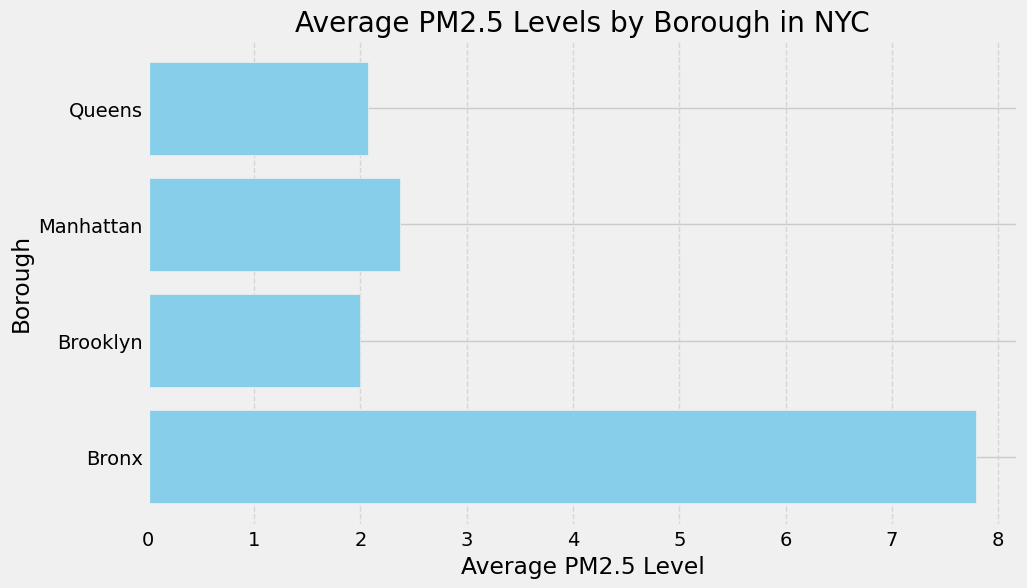

In [21]:
import matplotlib.pyplot as plt

# Extract borough names and corresponding average PM2.5 values from the Table
boroughs = borough_pm25_avg.column('borough')  # Get borough names
pm25_avg = borough_pm25_avg.column('pm25 mean')  # Get average PM2.5 levels

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Set figure size for better readability
plt.barh(boroughs, pm25_avg, color='skyblue')  # Plot horizontal bars with sky blue color

# Add labels and title
plt.xlabel("Average PM2.5 Level")  # X-axis label
plt.ylabel("Borough")  # Y-axis label
plt.title("Average PM2.5 Levels by Borough in NYC")  # Title of the plot

# Add grid lines along the x-axis for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


Task 3.2

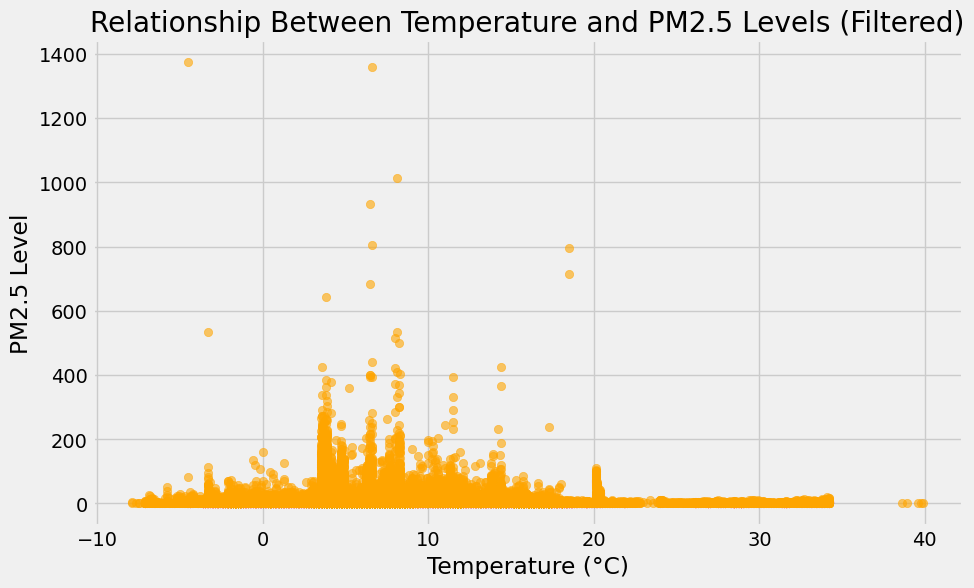

In [22]:
import matplotlib.pyplot as plt

# Step 1: Filter PM2.5 values below 2000
filtered_table = merged_table.where("pm25", lambda x: x < 2000)

# Step 2: Further filter temperature values below 1000
filtered_table = filtered_table.where("temperature", lambda x: x < 1000)

# Step 3: Extract filtered temperature and PM2.5 columns
temperature = filtered_table.column("temperature")
pm25 = filtered_table.column("pm25")

# Step 4: Create scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(temperature, pm25, color='orange', alpha=0.6)

# Step 5: Add labels and title
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 Level")
plt.title("Relationship Between Temperature and PM2.5 Levels (Filtered)")

# Step 6: Show the plot
plt.show()

Task 3.3

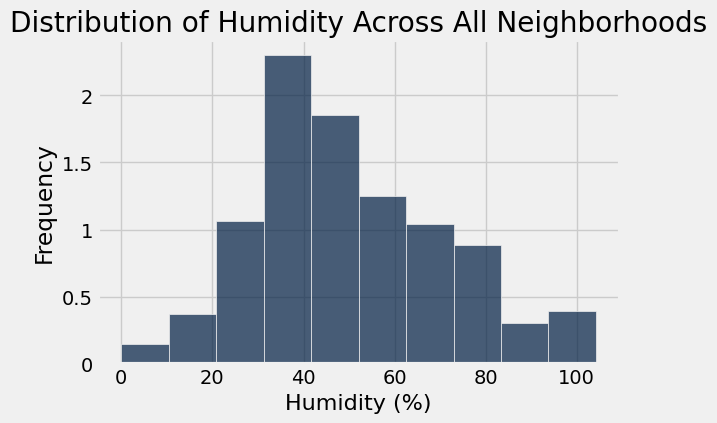

In [23]:
# Step 1: Create a histogram of humidity values using the datascience Table method
merged_table.hist("humidity")

# Step 2: Customize the histogram with title and axis labels
plt.title("Distribution of Humidity Across All Neighborhoods")  # Add a title
plt.xlabel("Humidity (%)")  # Label for the x-axis (Humidity levels)
plt.ylabel("Frequency")  # Label for the y-axis (Number of occurrences)

# Step 3: Display the histogram
plt.show()


# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


Task 4.1

In [24]:
# Function to categorize PM2.5 levels based on their value
def calculate_pm25_category(pm25):
    # Category: "Good" if PM2.5 is less than 12
    if pm25 < 12:
        return "Good"

    # Category: "Moderate" if PM2.5 is between 12 and 35 (inclusive of 12, exclusive of 35)
    elif 12 <= pm25 < 35:
        return "Moderate"

    # Category: "Unhealthy" if PM2.5 is greater than or equal to 35
    else:
        return "Unhealthy"

Task 4.2

In [25]:
# Convert the pandas DataFrame 'merged_data' into a 'Table' object
# This allows you to work with the data using the Table API
merged_table2 = Table().from_df(merged_data)

# Add a new column to the merged_table2, called "PM25_Category"
# This column is populated by applying the 'calculate_pm25_category' function
# to the existing 'pm25' column
merged_table2 = merged_table2.with_column(
    "PM25_Category",  # New column name
    merged_table2.apply(calculate_pm25_category, "pm25")  # Apply function to 'pm25' column
)

# Display the first 5 rows of the updated merged_table2 to verify the new column
merged_table2.show(5)


SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood,boroughCode,borough,@id,PM25_Category
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,POINT (-73.870087 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.2,15.1,1.05,1.18,1.18,POINT (-73.870094 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.1,0.74,0.76,0.76,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.2,1.15,4.48,47.36,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,20,3,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15.2,2.13,5.77,6.18,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good


Task 4.3

In [27]:
# Group the rows of 'merged_table' by the 'PM25_Category' column
# This will aggregate the data based on the unique values in the 'PM25_Category' column
pm25_category_counts = merged_table2.group('PM25_Category')

# Display the resulting grouped table showing the count of each PM25 category
pm25_category_counts.show()



PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

Task 5.1

In [38]:
merged_table3=Table().from_df(merged_data)
merged_table3.show(5)

SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood,boroughCode,borough,@id
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,POINT (-73.870087 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.2,15.1,1.05,1.18,1.18,POINT (-73.870094 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.1,0.74,0.76,0.76,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.2,1.15,4.48,47.36,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,20,3,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15.2,2.13,5.77,6.18,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park


In [39]:
# Import necessary library
import numpy as np

# Determine 10% of the total rows in the merged_table
num_rows = int(merged_table3.num_rows * 0.1)

# Use the sample() method to generate a random sample without replacement
# 'num_rows' specifies the number of rows to sample, and 'with_replacement=False' ensures no replacement
sampled_data = merged_table3.sample(num_rows, with_replacement=False)

# Show first few rows of the sampled data to verify the result
sampled_data.show(5)



SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood,boroughCode,borough,@id
NYCP1_01A,1580315340,40.8475,-73.8698,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.8,29.1,0.15,0.15,0.15,POINT (-73.869804 40.847473),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1580750460,40.8186,-73.8987,18,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.7,36.2,0.69,4.23,8.76,POINT (-73.898727 40.818649),176,Longwood,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Longwood
NYCP1_01A,1580904420,40.8279,-73.8955,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.8,67.9,0.31,0.31,0.31,POINT (-73.895531 40.827923),176,Longwood,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Longwood
NYCP1_01A,1580239620,40.8376,-73.8733,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.1,45.8,0,0,0,POINT (-73.873291 40.837639),215,Parkchester,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Parkchester
NYCP1_01A,1579708680,40.8058,-73.8885,22,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.9,42.4,1.52,4.74,6.14,POINT (-73.88855 40.805828),140,Hunts Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Hunts_Point


Task 5.2

In [40]:
# Calculate mean pm25 for the sampled data
mean_pm25_sample = np.mean(sampled_data.column('pm25'))

print("Mean PM2.5 of sampled data:", mean_pm25_sample)



Mean PM2.5 of sampled data: 7.77334880581


Task 5.3

In [41]:
import numpy as np

# List to store mean pm25 values from each iteration
sample_means = []

# Repeat the random sampling process 100 times
for _ in range(100):
    # Randomly sample from the 'pm25' values (without replacement)
    # 'merged_table.column('pm25')' provides the array of pm25 values
    # 'size=num_rows' determines the number of values to sample
    # 'replace=False' ensures that the sampling is done without replacement
    sample = np.random.choice(merged_table3.column('pm25'), size=num_rows, replace=False)

    # Compute the mean of the sampled 'pm25' values
    mean_pm25 = np.mean(sample)

    # Append the computed mean to the list of sample means
    sample_means= np.append(sample_means, mean_pm25)

# Print the first 10 sample means to verify the results
print("First 10 sample means:", sample_means[:10])



First 10 sample means: [ 7.39846401  7.48146088  7.47862182  7.57414972  7.17701578  7.33334965
  7.10216221  7.40130982  7.42220863  7.51809098]


Task 5.4

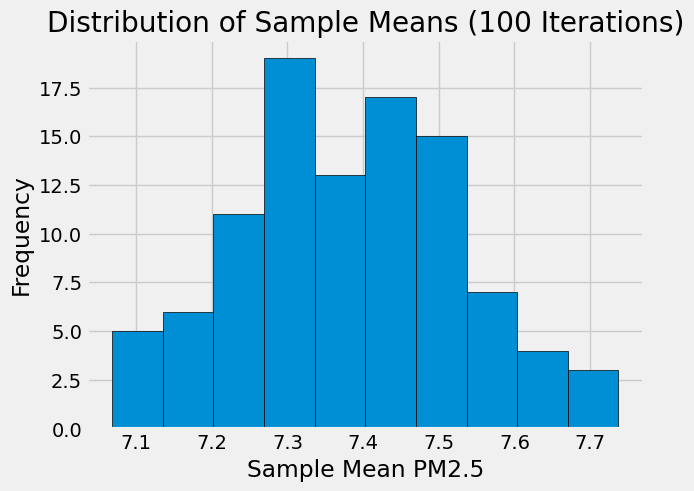

In [42]:
# Create a histogram of the 100 sample means
plt.hist(sample_means, bins=10, edgecolor='black')

# Add labels and title
plt.xlabel("Sample Mean PM2.5")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means (100 Iterations)")

# Show the plot
plt.show()



# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.